In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/bankloan.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
indices=df[df['Experience']<0].index

In [11]:
df[df['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP.Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal.Loan         52
Securities.Account    52
CD.Account            52
Online                52
CreditCard            52
dtype: int64

In [9]:
df.shape

(5000, 14)

In [12]:
df=df.drop(indices,axis=0)

In [13]:
df.shape

(4948, 14)

<Axes: xlabel='Education'>

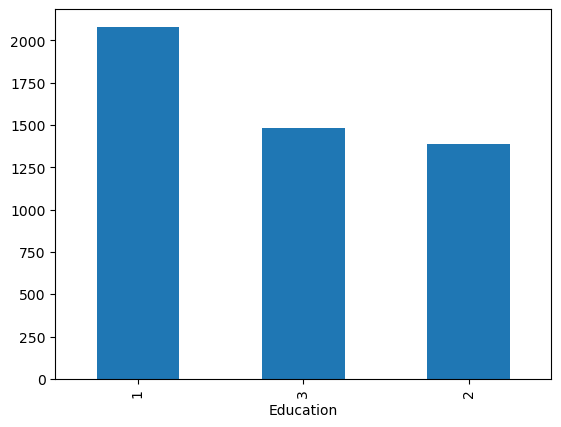

In [17]:
df['Education'].value_counts().plot(kind='bar')

In [19]:
df.isnull().values.any()

False

ID                       Axes(0.125,0.11;0.0466867x0.77)
Age                   Axes(0.181024,0.11;0.0466867x0.77)
Experience            Axes(0.237048,0.11;0.0466867x0.77)
Income                Axes(0.293072,0.11;0.0466867x0.77)
ZIP.Code              Axes(0.349096,0.11;0.0466867x0.77)
Family                 Axes(0.40512,0.11;0.0466867x0.77)
CCAvg                 Axes(0.461145,0.11;0.0466867x0.77)
Education             Axes(0.517169,0.11;0.0466867x0.77)
Mortgage              Axes(0.573193,0.11;0.0466867x0.77)
Personal.Loan         Axes(0.629217,0.11;0.0466867x0.77)
Securities.Account    Axes(0.685241,0.11;0.0466867x0.77)
CD.Account            Axes(0.741265,0.11;0.0466867x0.77)
Online                Axes(0.797289,0.11;0.0466867x0.77)
CreditCard            Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

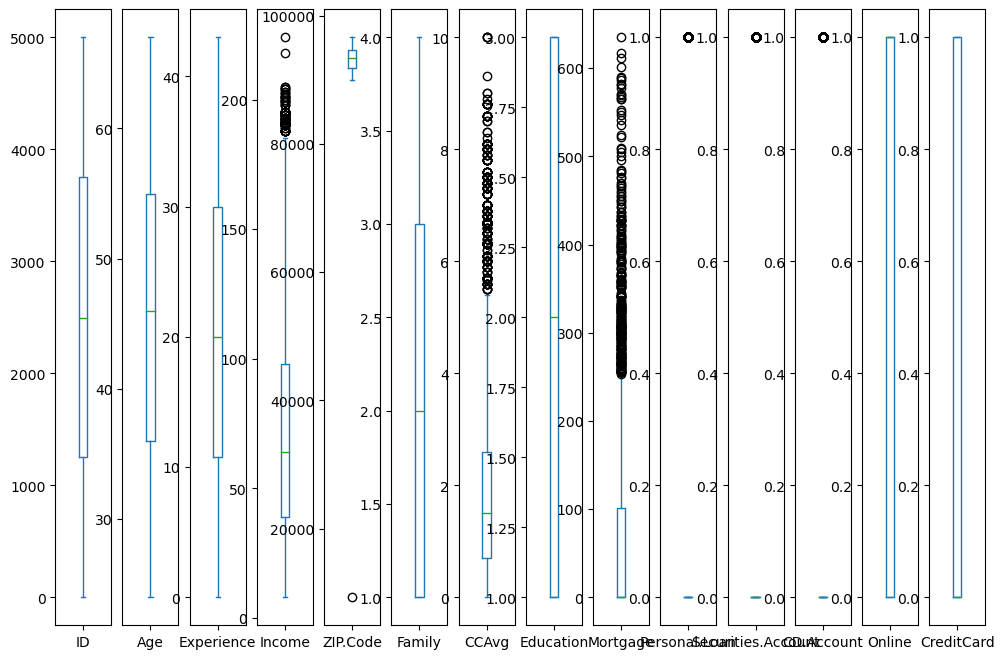

In [20]:
df.plot(kind='box',subplots=True,figsize=(12,8))

In [22]:
q1,q3=df['Mortgage'].quantile([0.25,0.75])

In [23]:
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
oindices=df[(df['Mortgage']<lower_bound) | (df['Mortgage']>upper_bound)].index

In [29]:
len(oindices)

288

In [30]:
df=df.drop(oindices,axis=0)

In [31]:
df.shape

(4660, 14)

In [36]:
df.duplicated().sum()

0

In [37]:
df['CreditCard'].value_counts()

CreditCard
0    3286
1    1374
Name: count, dtype: int64

In [38]:
x=df.drop('CreditCard',axis=1)

In [39]:
y=df['CreditCard']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [47]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [48]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred=rfc.predict(x_test)

In [50]:
accuracy=accuracy_score(y_test,y_pred)

In [51]:
accuracy

0.7217453505007153

In [52]:
conf_matrix=confusion_matrix(y_test,y_pred)

In [53]:
conf_matrix

array([[937,  26],
       [363,  72]], dtype=int64)

In [54]:
classific_report=classification_report(y_test,y_pred)

In [55]:
classific_report

'              precision    recall  f1-score   support\n\n           0       0.72      0.97      0.83       963\n           1       0.73      0.17      0.27       435\n\n    accuracy                           0.72      1398\n   macro avg       0.73      0.57      0.55      1398\nweighted avg       0.73      0.72      0.65      1398\n'

In [56]:
feature_importance=pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False)

In [57]:
feature_importance

ID                    0.166185
ZIP.Code              0.146587
Income                0.134146
CCAvg                 0.109226
Age                   0.106443
Experience            0.103362
CD.Account            0.059389
Mortgage              0.056030
Family                0.043179
Education             0.029026
Online                0.023336
Securities.Account    0.014229
Personal.Loan         0.008863
dtype: float64

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [60]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [61]:
y_pred1=gbc.predict(x_test)

In [62]:
accuracy=accuracy_score(y_test,y_pred1)

In [63]:
accuracy

0.7317596566523605

In [64]:
conf_matrix=confusion_matrix(y_test,y_pred1)
conf_matrix

array([[955,   8],
       [367,  68]], dtype=int64)

In [66]:
classific_report=classification_report(y_test,y_pred1)
classific_report

'              precision    recall  f1-score   support\n\n           0       0.72      0.99      0.84       963\n           1       0.89      0.16      0.27       435\n\n    accuracy                           0.73      1398\n   macro avg       0.81      0.57      0.55      1398\nweighted avg       0.78      0.73      0.66      1398\n'